In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
unique_season_stats_and_tourney_results = pd.read_csv('../../submissions/unique_season_stats_and_tourney_wins.csv')

unique_season_stats_and_tourney_results.query('Season == 2023')[['Season', 'TeamID', 'win_percentage','OrdinalRank', 'FG%', 'DR_per_gm', 'OR_per_gm', 'Stl_per_gm','Blk_per_gm', 'FT%', 'tournament_wins']].sort_values('tournament_wins', ascending=False).head(20)

,Season,TeamID,win_percentage,OrdinalRank,FG%,DR_per_gm,OR_per_gm,Stl_per_gm,Blk_per_gm,FT%,tournament_wins
12355,2023,1163,0.757576,25.0,0.459869,24.151515,11.787879,6.545455,4.878788,0.754414,6.0
12549,2023,1361,0.812500,17.0,0.441451,23.437500,9.218750,7.125000,3.718750,0.735577,5.0
12465,2023,1274,0.781250,38.0,0.485849,22.906250,8.968750,7.343750,3.281250,0.776224,4.0
12386,2023,1194,0.906250,140.0,0.468275,26.062500,9.125000,6.500000,2.531250,0.717584,4.0
12403,2023,1211,0.843750,2.0,0.522160,24.406250,8.937500,7.250000,3.250000,0.701937,3.0
12434,2023,1243,0.718750,42.0,0.453463,23.625000,8.781250,7.687500,2.781250,0.749634,3.0
12587,2023,1400,0.764706,11.0,0.468719,23.147059,8.588235,8.058824,3.647059,0.752322,3.0
12358,2023,1166,0.636364,10.0,0.467319,27.242424,7.515152,5.242424,4.181818,0.767399,3.0
12604,2023,1417,0.852941,8.0,0.458012,22.323529,10.235294,8.411765,3.852941,0.722420,2.0
12584,2023,1397,0.696970,22.0,0.436561,24.363636,11.515152,8.272727,3.636364,0.713568,2.0


In [5]:
unique_season_stats_and_tourney_results.sample(20)

,Season,TeamID,wins,losses,total_games,win_percentage,OrdinalRank,Score,FGM,FGA,FTM,FTA,PF,tournament_wins,FG%,DR_per_gm,OR_per_gm,Stl_per_gm,Blk_per_gm,FT%
10237,2017,1158,24.0,9.0,33.0,0.727273,118.0,2283.0,757.0,1742.0,565.0,761.0,568.0,0.0,0.434558,25.515152,8.393939,5.606061,3.393939,0.742444
639,1987,1193,14.0,15.0,29.0,0.482759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
11086,2019,1308,28.0,4.0,32.0,0.875000,42.0,2485.0,875.0,1897.0,435.0,646.0,579.0,0.0,0.461255,25.125000,12.625000,5.531250,2.468750,0.673375
8568,2012,1238,6.0,24.0,30.0,0.200000,315.0,1664.0,592.0,1568.0,354.0,517.0,581.0,0.0,0.377551,21.300000,11.733333,6.900000,3.133333,0.684720
2357,1993,1149,5.0,18.0,23.0,0.217391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13230,2025,1317,16.0,6.0,22.0,0.727273,72.0,1491.0,509.0,1128.0,320.0,416.0,338.0,0.0,0.451241,20.590909,8.772727,7.636364,2.454545,0.769231
744,1987,1329,7.0,19.0,26.0,0.269231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
6156,2005,1207,17.0,12.0,29.0,0.586207,86.0,1857.0,657.0,1458.0,325.0,463.0,502.0,0.0,0.450617,20.206897,10.586207,6.896552,4.551724,0.701944
4395,1999,1404,5.0,18.0,23.0,0.217391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3184,1995,1420,12.0,14.0,26.0,0.461538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN


# Standardize features

In [8]:
numeric_features = unique_season_stats_and_tourney_results.select_dtypes(include=['float64', 'int64']).drop(columns=['tournament_wins'])

scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)
scaled_df = pd.DataFrame(scaled_features, columns=numeric_features.columns)
scaled_df['tournament_wins'] = unique_season_stats_and_tourney_results['tournament_wins']


# Correlations

In [10]:
unique_season_stats_and_tourney_results.columns

Index(['Season', 'TeamID', 'wins', 'losses', 'total_games', 'win_percentage',
       'OrdinalRank', 'Score', 'FGM', 'FGA', 'FTM', 'FTA', 'PF',
       'tournament_wins', 'FG%', 'DR_per_gm', 'OR_per_gm', 'Stl_per_gm',
       'Blk_per_gm', 'FT%'],
      dtype='object')

/var/folders/fg/_cm9z0lx34b9zrpmj_h8s3q80000gn/T/ipykernel_55848/1346405410.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette='magma')


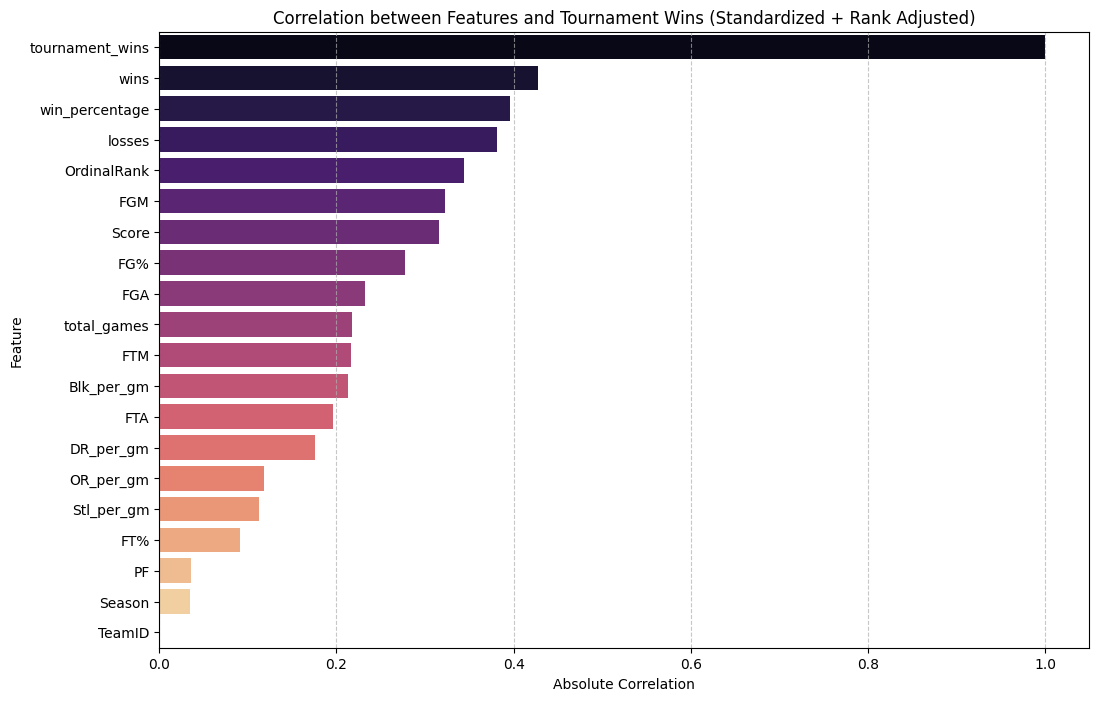

In [12]:
cols_to_drop = ['Season', 'TeamID', 'wins', 'losses', 'total_games','Score', 'FGM', 'FGA', 'FTM', 'FTA', 'PF','tournament_wins' ]
correlations_with_target = scaled_df.corr(numeric_only=True)['tournament_wins'].drop(columns = cols_to_drop).abs().sort_values(ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x=correlations_with_target.values, y=correlations_with_target.index, palette='magma')
plt.title('Correlation between Features and Tournament Wins (Standardized + Rank Adjusted)')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
